In [735]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from scipy.stats import norm, uniform 
from statsmodels.graphics.gofplots import qqplot 


Reading Dataframe

In [737]:
data = pd.read_csv("desafio_indicium_imdb.csv", index_col=0)
# Verificando a forma do dataframe
data.shape

(999, 15)

In [738]:
data.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [739]:
data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [740]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


# Checking categorical Columns

In [742]:
featcat=['Certificate', 'Genre', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4']
for i in range(len(featcat)):
    print(featcat[i],"---->SIZE=",data[featcat[i]].value_counts().shape[0])
    print(data[featcat[i]].value_counts().index)
    print(data[featcat[i]].value_counts()[:10])
    #plt.hist(data[feat[i]], bins=25, density=True, alpha=0.6, color='b')
    print("----------------------")
    print("----------------------")
    print("----------------------")
    print("----------------------")
    print("----------------------")

Certificate ---->SIZE= 16
Index(['U', 'A', 'UA', 'R', 'PG-13', 'PG', 'Passed', 'G', 'Approved', 'TV-PG',
       'GP', 'TV-14', '16', 'TV-MA', 'Unrated', 'U/A'],
      dtype='object', name='Certificate')
Certificate
U           234
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
Name: count, dtype: int64
----------------------
----------------------
----------------------
----------------------
----------------------
Genre ---->SIZE= 202
Index(['Drama', 'Drama, Romance', 'Comedy, Drama', 'Comedy, Drama, Romance',
       'Action, Crime, Drama', 'Biography, Drama, History',
       'Crime, Drama, Thriller', 'Crime, Drama, Mystery', 'Crime, Drama',
       'Animation, Adventure, Comedy',
       ...
       'Comedy, Crime, Mystery', 'Crime, Drama, Musical', 'Film-Noir, Mystery',
       'Comedy, Crime, Thriller', 'Crime, Drama, Horror',
       'Adventure, Thriller', 'Animation, Action, Sci-Fi',
     

# Checking Released_Year Columns

In [744]:
data['Released_Year'].value_counts().index

Index(['2014', '2004', '2009', '2013', '2016', '2001', '2006', '2007', '2015',
       '2012', '1993', '2010', '2019', '2003', '2017', '2008', '2000', '1997',
       '1995', '2018', '2002', '2011', '1998', '2005', '1999', '1962', '1992',
       '1973', '1987', '1979', '1991', '1994', '1988', '1960', '1989', '1982',
       '1996', '1967', '1985', '1986', '1975', '1957', '1984', '1971', '1972',
       '1980', '1990', '1968', '1964', '1940', '1978', '1976', '1966', '1959',
       '1948', '1955', '1954', '2020', '1974', '1953', '1963', '1961', '1946',
       '1951', '1939', '1956', '1950', '1983', '1981', '1944', '1952', '1958',
       '1965', '1949', '1931', '1969', '1977', '1942', '1938', '1970', '1935',
       '1933', '1927', '1947', '1928', '1934', '1932', '1925', '1941', '1945',
       '1922', '1943', '1921', '1930', '1920', '1926', '1937', '1936', '1924',
       'PG'],
      dtype='object', name='Released_Year')

## There is an strange value in 'Released_Year', we check more

In [746]:
data.loc[data['Released_Year'] == "PG"]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


## Apollo 13 was release in 1995 [(It can be check here)](https://www.imdb.com/title/tt0112384/). So the data can be corrected easily.

In [748]:
data.loc[data.iloc[965].name, 'Released_Year'] = "1995"

In [749]:
data.loc[data['Series_Title'] == "Apollo 13"]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


Year column  to int

In [751]:
df=data
df['Released_Year'] = pd.to_numeric(df["Released_Year"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(11)
memory usage: 157.2+ KB


#### Votes column  to int

In [753]:
df['No_of_Votes'] = pd.to_numeric(df["No_of_Votes"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(11)
memory usage: 157.2+ KB


#### Gross column  to int

In [755]:
df["Gross"] = df["Gross"].str.replace(",", "")
df["Gross"] = pd.to_numeric(df["Gross"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    float64
dtypes: float64(3), int64(2), object(10)
memory usage: 157.2+ KB


#### Runtime column  to int

In [757]:
df["Runtime"] = df["Runtime"].str.replace(" min", "")
df["Runtime"] = pd.to_numeric(df["Runtime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 157.2+ KB


In [758]:
#data2=data.dropna(how='any',inplace=True)  
data2=data.dropna(ignore_index=True)
data2.shape

(713, 15)

In [759]:
df=data2

### DATA visualization

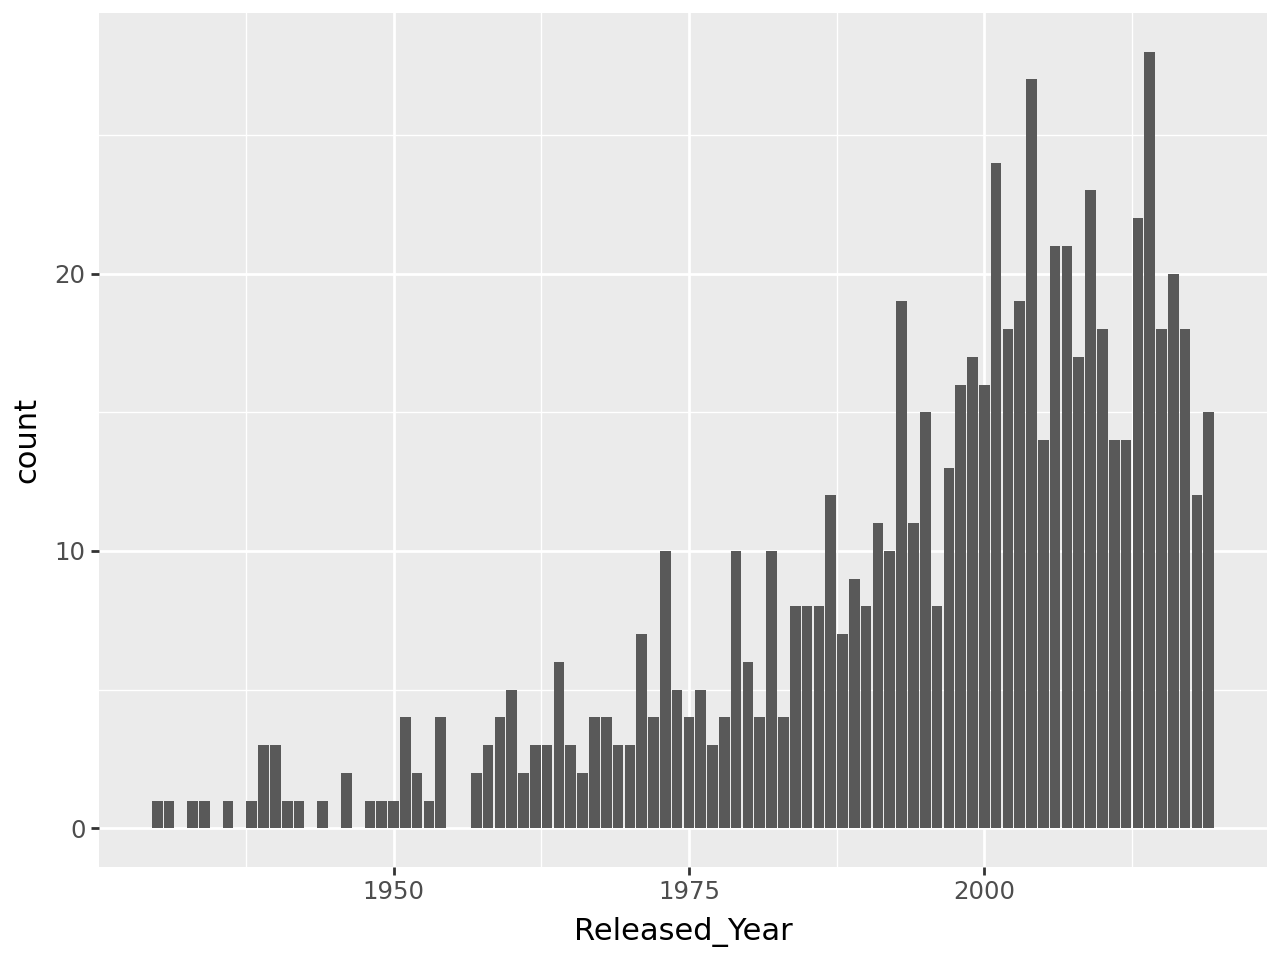

In [761]:
#Checking for the movies released year wise 

(ggplot(data2)         # defining what data to use
 + aes(x='Released_Year')    # defining what variable to use
 + geom_bar(size=20) # defining the type of plot to use
)

We can see the most of the movies which are released after 1975

# Top 10 movies Gross

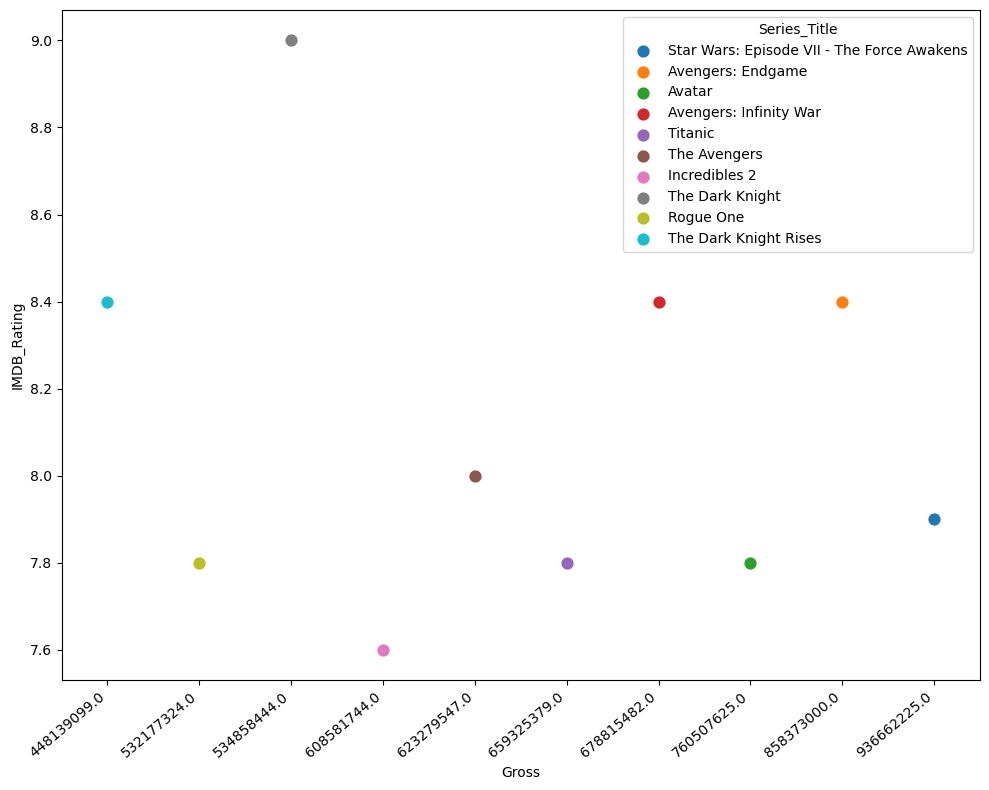

In [764]:



plt.figure(figsize=(10,8))
movie_df= data2.sort_values(by ='Gross' , ascending=False)
movie_df_new=movie_df.head(10)
ax=sns.pointplot(data=movie_df_new, x='Gross', y= 'IMDB_Rating', hue='Series_Title')
#ax=sns.pointplot(movie_df_new['Profit'], movie_df_new['budget'], hue=movie_df_new['movie_title'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Top 10 movies Meta_score


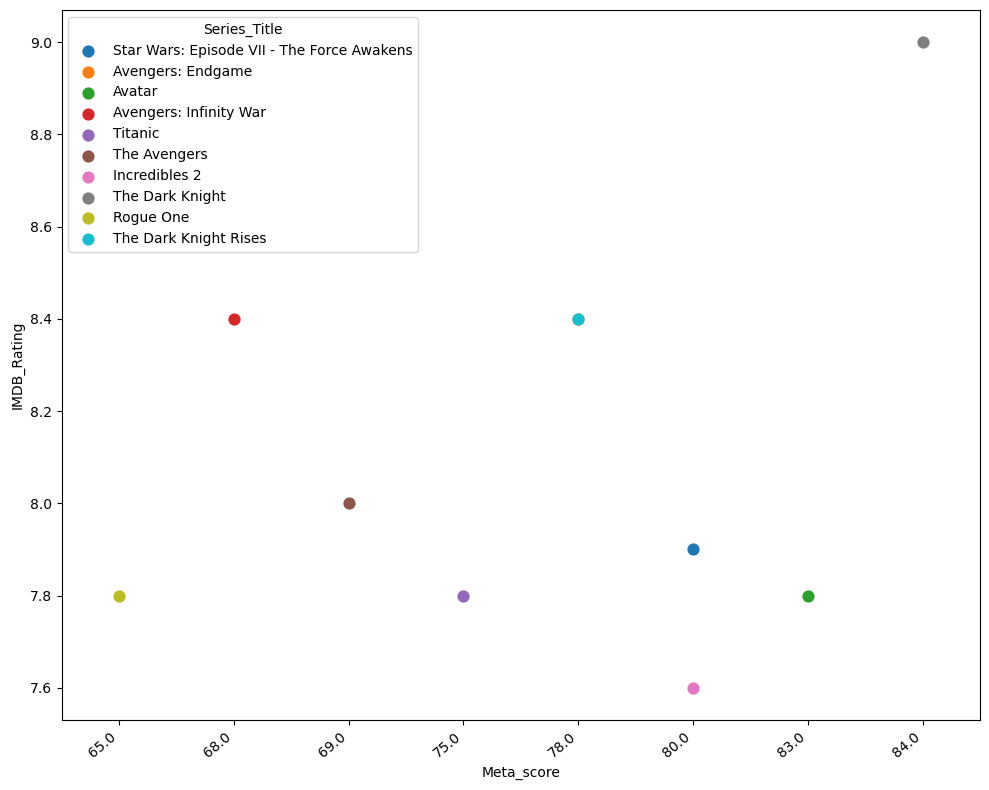

In [766]:


plt.figure(figsize=(10,8))
movie_df= data2.sort_values(by ='Gross' , ascending=False)
movie_df_new=movie_df.head(10)
ax=sns.pointplot(data=movie_df_new, x='Meta_score', y= 'IMDB_Rating', hue='Series_Title')
#ax=sns.pointplot(movie_df_new['Profit'], movie_df_new['budget'], hue=movie_df_new['movie_title'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Top 10 movies Director


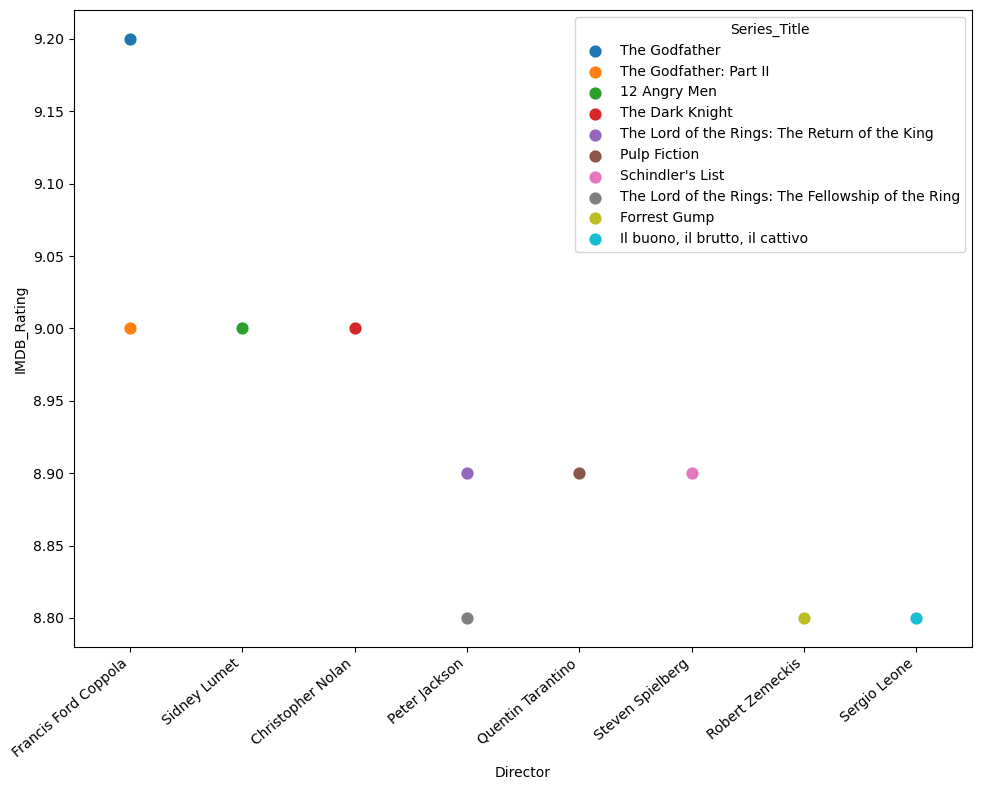

In [768]:


plt.figure(figsize=(10,8))
movie_df= data2.sort_values(by ='IMDB_Rating' , ascending=False)
movie_df_new=movie_df.head(10)
ax=sns.pointplot(data=movie_df_new, x='Director', y= 'IMDB_Rating', hue='Series_Title')
#ax=sns.pointplot(movie_df_new['Profit'], movie_df_new['budget'], hue=movie_df_new['movie_title'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#### Correlation of numeric columns

C:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future v

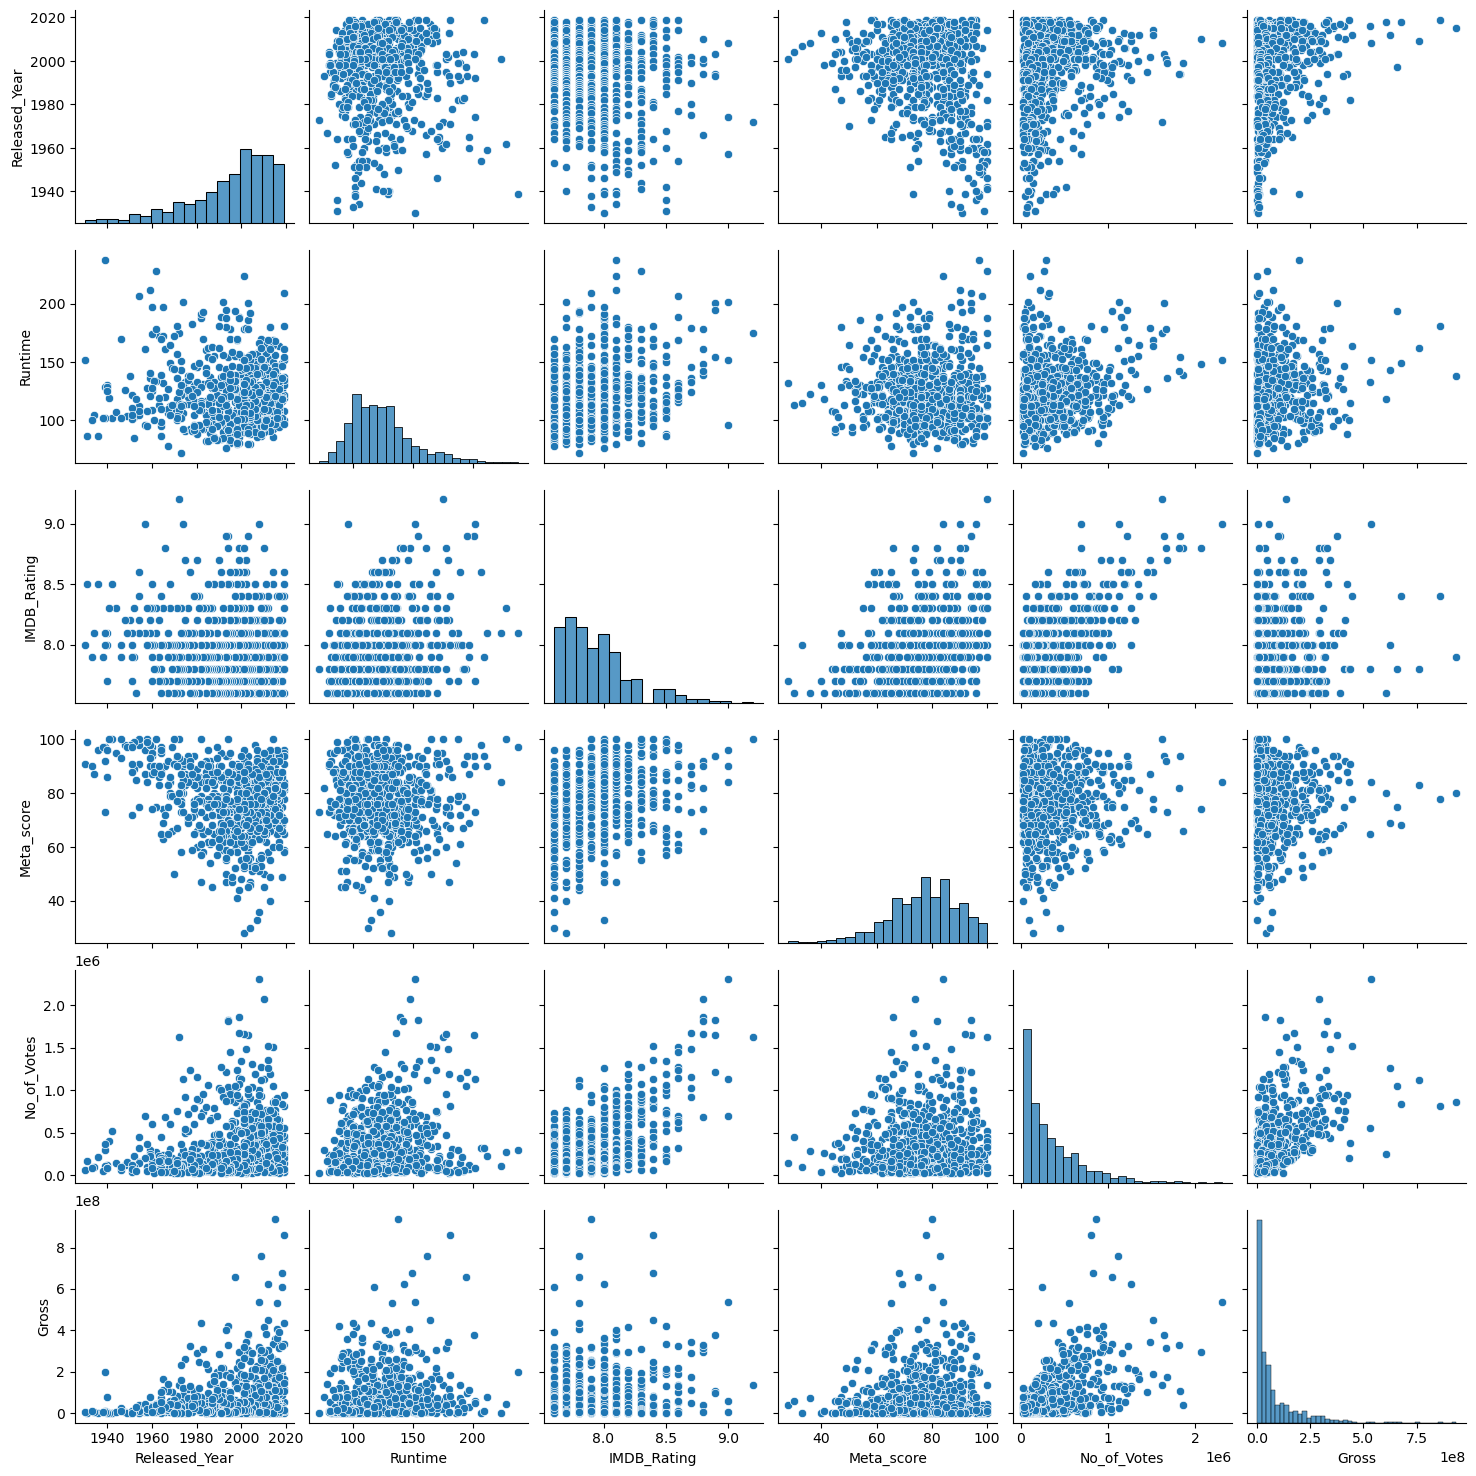

In [770]:
sns.pairplot(df)
plt.show()

C:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future v

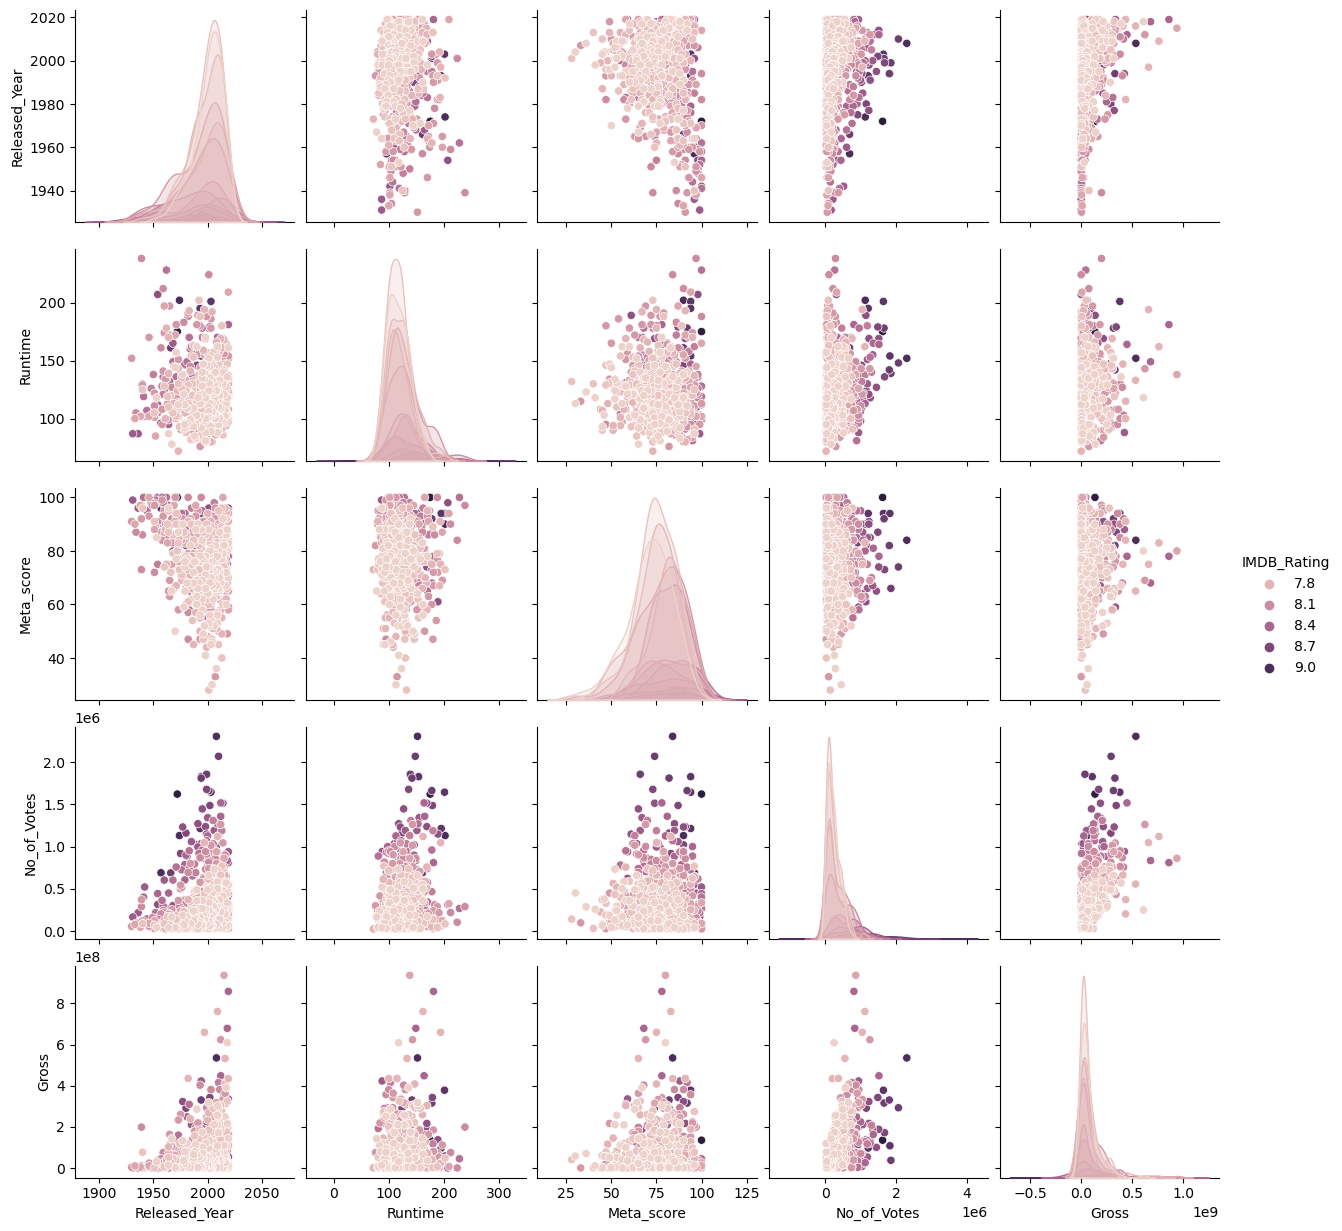

In [771]:
sns.pairplot(df, hue='IMDB_Rating')

# Checking Categorical  columns

# Transforming Categorical column Genre

In [774]:
df[["genre_1","genre_2","genre_3"]] = df['Genre'].str.split(',', n = 3, expand=True)
df = df.drop(['Genre'], axis=1)
df

C:\Users\marco\AppData\Local\Temp\ipykernel_4120\476831283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\marco\AppData\Local\Temp\ipykernel_4120\476831283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\marco\AppData\Local\Temp\ipykernel_4120\476831283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,genre_1,genre_2,genre_3
0,The Godfather,1972,A,175,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime,Drama,None
1,The Dark Knight,2008,UA,152,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action,Crime,Drama
2,The Godfather: Part II,1974,A,202,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime,Drama,None
3,12 Angry Men,1957,U,96,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Crime,Drama,None
4,The Lord of the Rings: The Return of the King,2003,U,201,8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,Action,Adventure,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,Giù la testa,1971,PG,157,7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690.0,Drama,War,Western
709,Kelly's Heroes,1970,GP,144,7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435.0,Adventure,Comedy,War
710,The Jungle Book,1967,U,78,7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612.0,Animation,Adventure,Family
711,A Hard Day's Night,1964,U,87,7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024.0,Comedy,Music,Musical


In [775]:
df['genre_1'] = df['genre_1'].str.replace(' ', '')
df['genre_2'] = df['genre_2'].str.replace(' ', '')
df['genre_3'] = df['genre_3'].str.replace(' ', '')

In [776]:
l1 = df.genre_1.unique()
l2 = df.genre_2.unique()
l3 = df.genre_3.unique()
l = list(l1) + list(l2) + list(l3)
l = [i for i in l if i]
l = list(set(l))
print(l),len(l)

['Mystery', 'Musical', 'Adventure', 'Drama', 'Biography', 'Action', 'Western', 'Music', 'Sport', 'History', 'Horror', 'Sci-Fi', 'War', 'Animation', 'Film-Noir', 'Family', 'Romance', 'Comedy', 'Fantasy', 'Crime', 'Thriller']


(None, 21)

In [777]:
listofzeros = [0] * 713
for genre in l:
    df[genre] = listofzeros
df.head()

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,...,Sci-Fi,War,Animation,Film-Noir,Family,Romance,Comedy,Fantasy,Crime,Thriller
0,The Godfather,1972,A,175,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,...,0,0,0,0,0,0,0,0,0,0
1,The Dark Knight,2008,UA,152,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,...,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,1974,A,202,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,...,0,0,0,0,0,0,0,0,0,0
3,12 Angry Men,1957,U,96,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,...,0,0,0,0,0,0,0,0,0,0
4,The Lord of the Rings: The Return of the King,2003,U,201,8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,...,0,0,0,0,0,0,0,0,0,0


In [778]:
for genre in l:
    for x in range(713):
        if df.at[x, 'genre_1'] == genre or df.at[x, 'genre_2'] == genre or df.at[x, 'genre_3'] == genre:
            df.at[x, genre] = 1
df.head()            

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,...,Sci-Fi,War,Animation,Film-Noir,Family,Romance,Comedy,Fantasy,Crime,Thriller
0,The Godfather,1972,A,175,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,...,0,0,0,0,0,0,0,0,1,0
1,The Dark Knight,2008,UA,152,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,...,0,0,0,0,0,0,0,0,1,0
2,The Godfather: Part II,1974,A,202,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,...,0,0,0,0,0,0,0,0,1,0
3,12 Angry Men,1957,U,96,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,...,0,0,0,0,0,0,0,0,1,0
4,The Lord of the Rings: The Return of the King,2003,U,201,8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,...,0,0,0,0,0,0,0,0,0,0


#### Correlation of genre columns

(21.0, 0.0)

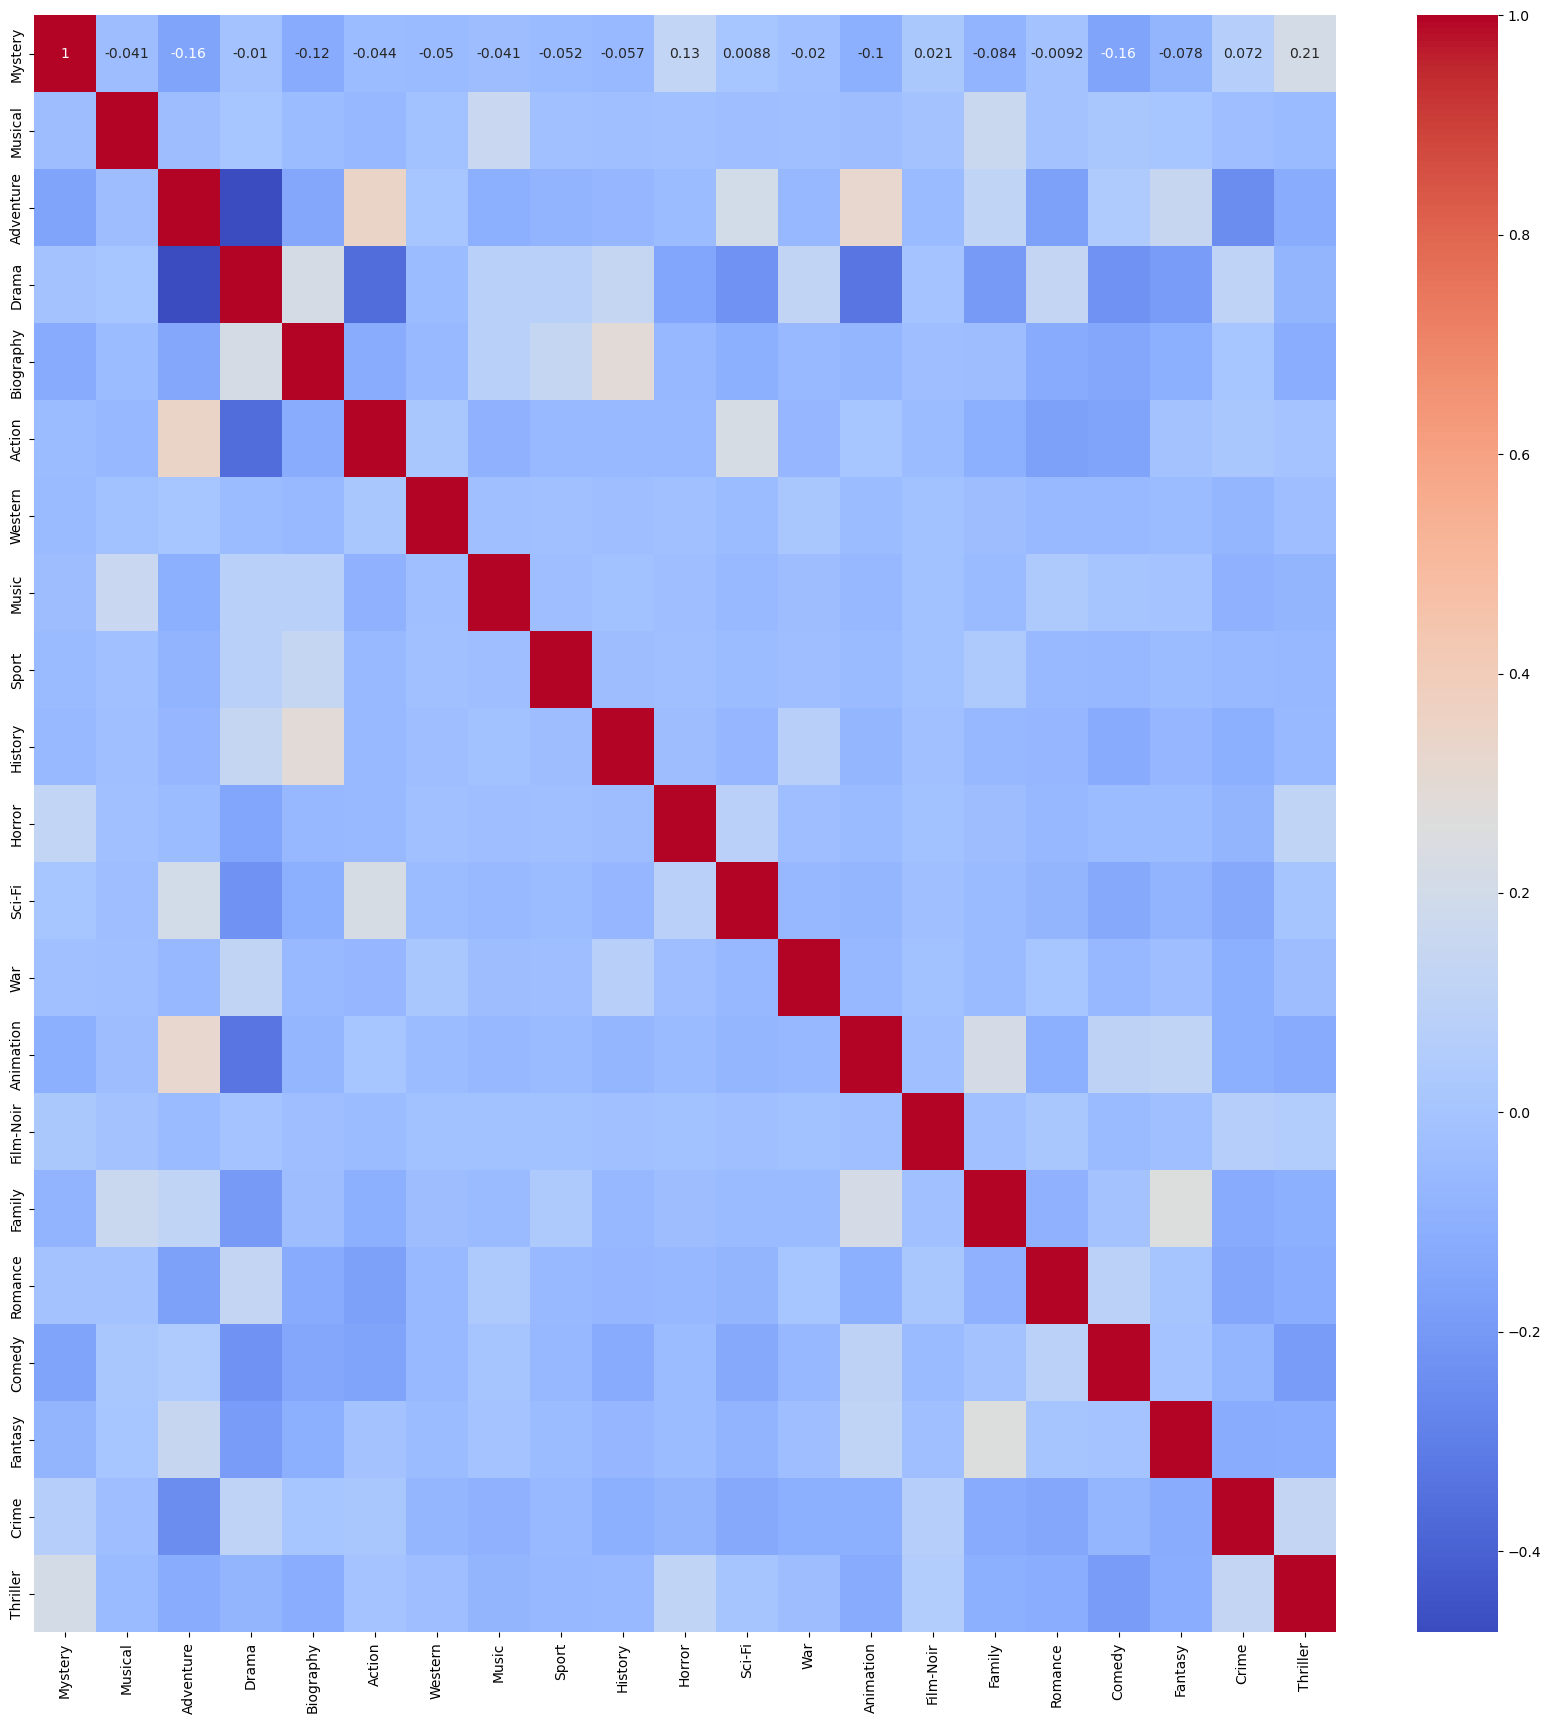

In [780]:
plt.figure(figsize=(21,21))
cor = df[l].corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.ylim()

#### Removing unwanted columns for model training

In [782]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   713 non-null    object 
 1   Released_Year  713 non-null    int64  
 2   Certificate    713 non-null    object 
 3   Runtime        713 non-null    int64  
 4   IMDB_Rating    713 non-null    float64
 5   Overview       713 non-null    object 
 6   Meta_score     713 non-null    float64
 7   Director       713 non-null    object 
 8   Star1          713 non-null    object 
 9   Star2          713 non-null    object 
 10  Star3          713 non-null    object 
 11  Star4          713 non-null    object 
 12  No_of_Votes    713 non-null    int64  
 13  Gross          713 non-null    float64
 14  genre_1        713 non-null    object 
 15  genre_2        638 non-null    object 
 16  genre_3        478 non-null    object 
 17  Mystery        713 non-null    int64  
 18  Musical   

In [783]:
# Colunas do dataset
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross', 'genre_1', 'genre_2',
       'genre_3', 'Mystery', 'Musical', 'Adventure', 'Drama', 'Biography',
       'Action', 'Western', 'Music', 'Sport', 'History', 'Horror', 'Sci-Fi',
       'War', 'Animation', 'Film-Noir', 'Family', 'Romance', 'Comedy',
       'Fantasy', 'Crime', 'Thriller'],
      dtype='object')

In [784]:
## The certificate, director and actors columns are not included in this model (we assume that they are uniformly distribuited). 
## But in a future model could be included to get a more precise model.
## 'Family' column  is not included to avoid dummy variable trap
df_model = df[['Released_Year', 'Runtime',
       'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Biography', 'Family', 'Film-Noir', 'Horror',
       'Romance', 'Sci-Fi', 'Drama', 'Fantasy', 'Comedy', 'Mystery', 'War',
       'Animation', 'Crime', 'Thriller', 'Action', 'Musical', 'Music',
       'Adventure', 'History', 'Sport']]
df_model.head()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Biography,Family,Film-Noir,Horror,...,War,Animation,Crime,Thriller,Action,Musical,Music,Adventure,History,Sport
0,1972,175,9.2,100.0,1620367,134966411.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2008,152,9.0,84.0,2303232,534858444.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1974,202,9.0,90.0,1129952,57300000.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1957,96,9.0,96.0,689845,4360000.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2003,201,8.9,94.0,1642758,377845905.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


### CONSTRUCTION OF THE MODELS (3 models)

In [786]:
X = df_model.drop('IMDB_Rating', axis=1)
y=df_model['IMDB_Rating']

In [787]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


# 1) Linear regression model

In [789]:
from sklearn.linear_model import LinearRegression
Lregressor = LinearRegression()
Lregressor.fit(X_train,y_train)

#regressor.coef_,regressor.intercept_

LinearRegression()

In [790]:
accuracy = regressor.score(X_test,y_test)
print('Accuracy of the linear  model is',accuracy*100,'%')

Accuracy of the linear  model is 84.60316728435706 %


# 2) Polynomial Regression model (degree 2 and 3)

In [792]:
from sklearn.preprocessing import PolynomialFeatures
for degr in [2,3]:
    poly_reg = PolynomialFeatures(degree = degr)
    X_poly = poly_reg.fit_transform(X_train)
    lin_reg2 = LinearRegression(fit_intercept = True)
    lin_reg2.fit(X_poly,y_train)
    X_polytest = poly_reg.fit_transform(X_test)
    accuracy = lin_reg2.score(X_polytest,y_test)
    print('Accuracy of the model is with degree',str(degr),'=',accuracy*100,'%')

Accuracy of the model is with degree 2 = 57.86316522860536 %
Accuracy of the model is with degree 3 = 19.411224036367237 %


# 3) Random Forest Regression

In [794]:
from sklearn.ensemble import RandomForestRegressor
x = 500
Fregressor = RandomForestRegressor(n_estimators = x)
Fregressor.fit(X_train, y_train)

accuracy= Fregressor.score(X_test, y_test)
print('Accuracy of the model with',str(x),'n_estimators','=',accuracy*100,'%')

Accuracy of the model with 500 n_estimators = 62.09216047942741 %


# Pediction of the IMDB score for the movie The Shawshank Redemption

In [796]:
x0={'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}

x0data={'Released_Year': [1994],
 'Runtime': [142],
 'Meta_score': [80.0],
 'No_of_Votes': [2343110],
 'Gross': [28341469],
 'Biography': [0],
 'Family': [0],
 'Film-Noir': [0],
 'Horror': [0],
 'Romance': [0],
 'Sci-Fi': [0],
 'Drama': [1],
 'Fantasy': [0],
 'Comedy': [0],
 'Mystery': [0],
 'War': [0],
 'Animation': [0],
 'Crime': [0],
 'Thriller': [0],
 'Action': [0],
 'Musical': [0],
 'Music': [0],
 'Adventure': [0],
 'History': [0],
 'Sport': [0]}   
# creating a Dataframe object 
df_x0 = pd.DataFrame(x0data)
df_x0.columns

Index(['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross',
       'Biography', 'Family', 'Film-Noir', 'Horror', 'Romance', 'Sci-Fi',
       'Drama', 'Fantasy', 'Comedy', 'Mystery', 'War', 'Animation', 'Crime',
       'Thriller', 'Action', 'Musical', 'Music', 'Adventure', 'History',
       'Sport'],
      dtype='object')

In [797]:
print("The predicted Imdb score (Random Forest) for the movie The Shawshank Redemption is ",round(Fregressor.predict(df_x0)[0],4))
print("The predicted Imdb score (Linear Regression) for the movie The Shawshank Redemption is ",round(Lregressor.predict(df_x0)[0],4))

The predicted Imdb score (Random Forest) for the movie The Shawshank Redemption is  8.7886
The predicted Imdb score (Linear Regression) for the movie The Shawshank Redemption is  9.4301


The real IMBD score for the movie The Shawshank Redemption  is 9.2  [(It can be checked Here)](https://www.imdb.com/title/tt0111161/)

# the best tested model is linear regression since it have the maximun accuracy (85.3407888540968)

In [801]:
#Saving the linear model in a pkl file


#import pickle

#with open("modeloIMDB.pkl", "wb") as arquivo:
#   pickle.dump(Lregressor,arquivo)

In [803]:
#testing the pkl file
import pickle
with open("modeloIMDB.pkl", "rb") as arquivo:
	   modelo = pickle.load(arquivo)
import pandas as pd
previsao = modelo.predict(df_x0)[0]
print(previsao)

9.430093814923877
